In [1]:
import cv2
import numpy as np
import os

In [19]:
image_data = '/home/rajeevv/data/720x405_annotations_data/crops'
image_obj_resized_to_50x50 = {}
for category in os.listdir(image_data):
    if category == 'Dukes':
        continue
    print ('processing ',category)
    for image in os.listdir(image_data+'/'+category):
        image_file = image_data+"/"+category+"/"+image
        img = cv2.imread(image_file)
        resized_image = cv2.resize(img,(50,50))
        image_obj_resized_to_50x50[image_file] = resized_image.reshape(1,7500)

processing  GarudaFood
processing  Kinder
processing  Lotte
processing  Mangharam
processing  Meiji
processing  Nestle
processing  Parle
processing  Pillsburry
processing  Snickers
processing  Sunfeast


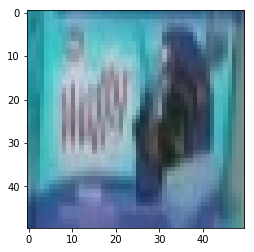

In [20]:
import matplotlib.pyplot as plt
look_for = '/home/rajeevv/data/720x405_annotations_data/crops/Dukes/1079_2163.jpg'
look_for_img = cv2.resize(cv2.imread(look_for),(50,50))
plt.imshow(look_for_img)
look_for_img_flat = look_for_img.reshape(1,7500)

656539


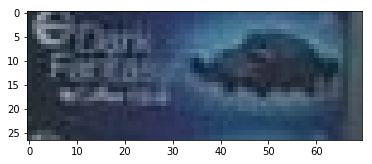

In [22]:
import sys
distance = sys.maxsize
matched_image_file = None
for key in image_obj_resized_to_50x50:
    l1_distance = np.sum( np.absolute(look_for_img_flat - image_obj_resized_to_50x50[key]) )
    if l1_distance < distance:
        distance = l1_distance
        matched_image_file = key

print(distance)
if matched_image_file != None:
    matched_image = cv2.imread(matched_image_file)
    plt.imshow(matched_image)
    

738166


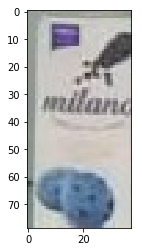

In [23]:
distance = sys.maxsize
matched_image_file = None
for key in image_obj_resized_to_50x50:
    l2_distance = np.sum( np.square(look_for_img_flat - image_obj_resized_to_50x50[key]) )
    if l2_distance < distance:
        distance = l2_distance
        matched_image_file = key

print(distance)
if matched_image_file != None:
    matched_image = cv2.imread(matched_image_file)
    plt.imshow(matched_image)
